In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import re
import numpy as np
#import Visualizer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Data_Science_Internship.xlsx")

In [3]:
df.head(5)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      46608 non-null  int64         
 1   Agent_id        46608 non-null  object        
 2   status          46608 non-null  object        
 3   lost_reason     43244 non-null  object        
 4   budget          42908 non-null  object        
 5   lease           44267 non-null  object        
 6   movein          32970 non-null  datetime64[ns]
 7   source          46608 non-null  object        
 8   source_city     46608 non-null  object        
 9   source_country  46608 non-null  object        
 10  utm_source      46608 non-null  object        
 11  utm_medium      46608 non-null  object        
 12  des_city        46608 non-null  object        
 13  des_country     46608 non-null  object        
 14  room_type       23061 non-null  object        
 15  le

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.isna().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [8]:
df.drop(df[(df["status"] != "LOST") & (df["status"] != "WON")].index, inplace = True)

In [9]:
df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', 0, inplace=True)

In [10]:
df.lease.replace('lease', 0, inplace=True)


In [11]:
df.replace(0, np.nan, inplace=True)

In [12]:
df.dropna(thresh= 12, inplace= True)

In [13]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature not in ["lease"] and feature not in ["budget"] and feature not in ["room_type"] and feature not in ["lost_reason"]]
for i in df.columns:
        if i in categorical_features:
            df[i] = le.fit_transform(df[i])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36680 entries, 2 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        36680 non-null  int32         
 1   status          36680 non-null  int32         
 2   lost_reason     34402 non-null  object        
 3   budget          36672 non-null  object        
 4   lease           32924 non-null  object        
 5   movein          28347 non-null  datetime64[ns]
 6   source          36680 non-null  int32         
 7   source_city     36680 non-null  int32         
 8   source_country  36680 non-null  int32         
 9   utm_source      36680 non-null  int32         
 10  utm_medium      36680 non-null  int32         
 11  des_city        36680 non-null  int32         
 12  des_country     36680 non-null  int32         
 13  room_type       22825 non-null  object        
 14  lead_id         36680 non-null  int32         
dtypes: date

***PREPROCESSING ON LEASE COLUMN***

In [15]:
df["lease"].unique()

array(['Full Year Course Stay 40 - 44 weeks', nan, 'semester-stay', 51,
       'Semester Stay 20 - 24 weeks',
       'Complete Education Year Stay 50 - 52 weeks', 'full-course-stay',
       'full-year-stay', 'Other', '51 weeks', 44, 18,
       'Summer/Short Stay 8 - 12 weeks', 'other', 'short-stay',
       '44 weeks', 12, '1 year', 43, 'full year stay', 294,
       '20 - 24 weeks', '1 year .', 48, 40, 6, 8, 84, 'full course', 45,
       39, 1, 50, 25, '45 weeks', '6 weeks', 32, '44/week', 42, '3 month',
       '44-51 weeks', '3 months', '6 months', '2 years', '51weeks', 10,
       52, '2 weeks', '52 weeks', 46, 13, 'short stay', 4, '52weeks',
       'FULL YEAR', 69, 16, '50 - 52 weeks', '44 - 51 weeks', '4-8 weeks',
       '4 weeks', 3, 'Full year stay', 11, 'Academic year', '10-15 weeks',
       '40-44', '52 weeks]', 26, '40 - 44 weeks', '51 week', '36 - 44',
       140, 41, '44/51 weeks', '40 weeks', '12-24', '1 month',
       '10 months', '44 WEEKS', 2, '24-44 weeks', 350, '06 month

In [16]:
df["lease"] = df["lease"].str.replace("\\", " ")
df["lease"] = df["lease"].str.replace("/", " ")
df["lease"] = df["lease"].str.replace("mnth", "months")
df["lease"] = df["lease"].str.replace("Stay", "")
df["lease"] = df["lease"].str.replace("weeeks", "")
df["lease"] = df["lease"].str.replace("2 years", "100")
df["lease"] = df["lease"].str.replace("Other", "0", flags= re.IGNORECASE)
df["lease"] = df["lease"].str.replace("44 51", "45")
df["lease"] = df["lease"].str.replace("WEEKS", "weeks")
df["lease"] = df["lease"].str.replace("not sure", "0")
df["lease"] = df["lease"].str.replace("ASAP", "0")
df["lease"] = df["lease"].str.replace("3 years", "150")
df["lease"] = df["lease"].str.replace("1 month ", "4")
df["lease"] = df["lease"].str.replace("<=8", "8")
df["lease"] = df["lease"].str.replace("7 days", "1")
df["lease"] = df["lease"].str.replace("44 or 51 ", "45")
df["lease"] = df["lease"].str.replace("51s", "51")
df["lease"] = df["lease"].str.replace("Weeks", "week")
df["lease"] = df["lease"].str.replace("43 44 ", "44")


In [17]:
df.loc[df["lease"].str.contains("Full year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("1 year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("1year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full yyear",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full-year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full-COURSE",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("COMPLETE ",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("SEM",na= False, flags= re.IGNORECASE), "lease"] = "22 weeks"
df.loc[df["lease"].str.contains("SHORT",na= False, flags= re.IGNORECASE), "lease"] = "9 weeks"
df.loc[df["lease"].str.contains("dec",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("dec",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("whole year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("full course",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("academic",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("aug",na= False, flags= re.IGNORECASE), "lease"] = "32 weeks"


In [18]:
b = df[df["lease"].str.endswith(("month","mnth","months","m"), na=False)]

In [19]:
b[["start", "end"]] = b["lease"].str.split(" ", expand=True)

In [20]:
b = b.drop("end", axis=1)


In [21]:
b["start"] = b["start"].str.replace("long", "12")
b["start"] = b["start"].str.replace("pm","")
b["start"] = b["start"].str.replace("months","")
b["start"] = b["start"].str.replace("m","")
b["start"] = b["start"].str.replace("-", "+")


In [22]:
for i in b["start"].index:
    if "+" in b["start"][i]:
        j = b["start"][i]
        l,m = j.split("+")
        b["start"][i]= (int(l)+int(m))/2

In [23]:
b["lease"] = (b["start"].astype(int)) * 4
b["lease"] = b["lease"].replace(2100, 0)
b

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,start
943,35,0,Short stay,£60 - £120 Per week,12,2022-09-14,126,3029,99,20,3,18,8,Entire Place,23295,3
982,28,0,Not a student,2200 pm,12,2022-09-01,164,3868,163,9,3,194,8,NaN,23063,3
1064,19,0,Not a student,1000/month,24,NaT,164,3265,163,20,30,200,8,NaN,4483,6
2958,28,0,Low budget,600-610pm,12,2022-09-10,18,4173,180,15,4,194,8,NaN,14519,3
3014,63,0,Short stay,£121 - £180 Per Week,4,2022-09-02,126,3868,163,20,3,194,8,Studio,13352,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42325,97,0,Low budget,60/week,36,2022-09-11,126,2596,163,20,3,35,8,Ensuite,3726,9
42780,61,0,Short stay,£60 - £120 Per week,4,2022-08-27,126,339,163,20,3,87,8,NaN,6658,1
45555,105,0,Short stay,0-0,4,NaT,278,2921,163,20,30,151,8,NaN,18330,1
46202,61,0,Not a student,0-0,12,NaT,232,3868,163,9,3,151,8,NaN,22561,3


In [24]:
b.drop("start", axis=1 , inplace=True)
b["lease"] = b["lease"].astype(str)
df.update(b)

In [25]:
df = df.reset_index(drop=True)

In [26]:
df.lease.iloc[34527] = "12"
df.lease.iloc[9806] = "4"
df.lease.iloc[27381] = "51"
df.lease.iloc[30763] = "44"

In [27]:
for i in df.lease.index:
    if df.lease.iloc[i] == "-":
        df.lease.iloc[i] = ""

In [28]:
df.lease = df.lease.astype(str)

In [29]:
for i in df.lease.index:
    if "week" in df.lease.iloc[i] or "weeks" in df.lease.iloc[i]:
        j = df["lease"].iloc[i]
        l,m = j.split("w",1)
        df["lease"][i]= (l)
    elif df.lease.iloc[i] == "":
        df.lease.iloc[i] = "0"

In [30]:
df.lease = df.lease.str.replace("weeks", "")

In [31]:
for i in df.lease.index:
    if "-" in df.lease.iloc[i]:
        j = df["lease"].iloc[i]
        l,m = j.split("-",1)
        df["lease"][i]= (int(l)+int(m))/2

In [32]:
df.lease = df["lease"].replace("nan", "0")

In [33]:
df.lease = df.lease.astype(float)


In [34]:
df.lease = df.lease.astype(int)


In [35]:
df["cat_lease"] = df["lease"].replace({range(0,10):"lowest",range(10,20):"low",range(20,30):"average",range(30,40):"medium", range(40,50):"high",range(50,70):"higher", range(70, 210): "highest"})


In [36]:
df.cat_lease.unique()

array(['high', 'lowest', 'average', 'higher', 'low', 'highest', 'medium'],
      dtype=object)

In [37]:
df.cat_lease = le.fit_transform(df.cat_lease)

***PREPROCESSING ON BUDGET COLUMN***

In [38]:
df["budget"].nunique()
df["budget"].iloc[18738] = "0"


In [39]:
df["budget"] = df["budget"].str.replace("pw", " Per Week")
df["budget"] = df["budget"].str.replace("pcm", " per month")
df["budget"] = df["budget"].str.replace("PCM", " per month")
df["budget"] = df["budget"].str.replace("pm", " per month")
df["budget"] = df["budget"].str.replace("  Per Week -151 ", "-151")
df["budget"] = df["budget"].str.replace("0 month", "0 per month")
df["budget"] = df["budget"].str.replace("0 week", "0 Per Week")
df["budget"] = df["budget"].str.replace(" Per Week", "")
df["budget"] = df["budget"].str.replace(" Per week", "")
df["budget"] = df["budget"].str.replace(" per week ", "")
df["budget"] = df["budget"].str.replace(" per weeks", "")
df["budget"] = df["budget"].str.replace("per ek", " Per Week")
df.loc[df["budget"].str.contains("no",na= False, flags= re.IGNORECASE), "budget"] = "0"

In [40]:
df["budget"] = df["budget"].str.replace("Per week", "")
df["budget"] = df["budget"].str.replace(" per week", "")
df["budget"] = df["budget"].str.replace("£", "")
df["budget"] = df["budget"].str.replace("0-0", "0")
df["budget"] = df["budget"].str.replace("/", " ")
df["budget"] = df["budget"].replace(np.nan, "0")
df["budget"] = df["budget"].str.replace("month ", " per month")
df.budget = df.budget.str.replace("160 200", "160-200")


In [41]:
df["budget"] = df["budget"].str.replace(">", "")
df["budget"] = df["budget"].str.replace("0-100 Pounds", "0-113")
df["budget"] = df["budget"].str.replace("0-200-400", "200")
df["budget"] = df["budget"].str.replace("€", "")
df["budget"] = df.budget.str.replace("s", "")
df["budget"] = df.budget.str.replace("Le than  ", "")
df["budget"] = df.budget.str.replace("0-60 to 75", "70")
df["budget"] = df.budget.str.replace("0-200-260", "200-260")
df["budget"] = df.budget.str.replace("Around 400 pound", "450")
df["budget"] = df.budget.str.replace("prw", "")
df["budget"] = df.budget.str.replace("0-10,000 GBP PA", "0-235")
df["budget"] = df.budget.str.replace("cheapet-highet", "0 - 100")
df["budget"] = df.budget.str.replace("0-260-275", "270")
df["budget"] = df.budget.str.replace("50 -60 gbp", "55-65")
df["budget"] = df.budget.str.replace("0-120 140", "130")
df["budget"] = df.budget.str.replace("0-120 to 180", "150")
df["budget"] = df.budget.str.replace("0-5-10 lakh", "115-230")
df["budget"] = df.budget.str.replace("90-100 gbp", "110")
df["budget"] = df.budget.str.replace("max budget", "")
df["budget"] = df["budget"].str.replace("0-130-175", "0-175")
df["budget"] = df["budget"].str.replace("flexible", "100")
df["budget"] = df["budget"].str.replace("maximum", "")
df["budget"] = df["budget"].str.replace("0-Between", "")
df["budget"] = df["budget"].str.replace("110 s", "110")
df["budget"] = df["budget"].str.replace("flexible", "100")
df["budget"] = df["budget"].str.replace(" week", "")
df["budget"] = df["budget"].str.replace(" WEEK", "")
df["budget"] = df["budget"].str.replace(" W", "")
df["budget"] = df["budget"].str.replace("week", "")
df["budget"] = df.budget.str.replace("Pereek", "")
df["budget"] = df["budget"].str.replace("7000 pound", "165")
df["budget"] = df["budget"].str.replace("month.", "month")
df["budget"] = df["budget"].str.replace("momth", "month")


In [42]:
df.budget.iloc[610] = "0"
df.room_type.iloc[610] = "ensuite"

In [43]:
df["budget"] = df['budget'].replace(np.nan, 0)

In [44]:
a = df[df["budget"].str.endswith("month", na=False)]
a[["start", "end"]] = a["budget"].str.split("per month", expand=True)

In [45]:
a["start"] = a["start"].str.replace("500 600", "500-600")
a["start"] = a["start"].str.replace(">", "0-")

In [46]:
a[["start", "end"]] = a["start"].str.split("month", expand=True,n=1)


In [47]:
a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)

In [48]:
a["start"] = a["start"].replace(np.nan, 0)

In [49]:
a["middle"] = a["middle"].str.replace("Per","")


In [50]:
a["start"] = a["start"].str.replace("p","")
a["start"] = a["start"].str.replace("a","")
a["start"] = a["start"].str.replace("Per","")
a["start"] = a["start"].str.replace("m","")



In [51]:
a["middle"] = a["middle"].replace(np.nan, 0)

In [52]:
a["start"] = (a["start"]).astype(int)
a["middle"] = (a["middle"]).astype(int)


In [53]:
a["start"] = (a["start"]/4)
a["middle"] = (a["middle"]/4)

In [54]:
a = a.drop("end", axis=1)
a = a.drop("last", axis=1)

In [55]:
 
def concat_col_mid(data: pd.DataFrame):
    start_col = data['start']
    middle_col = data['middle']
    
    for row in data.index:
        start_value = start_col[row]
        middle_col_val = middle_col[row]
        
        new_value = f"{int(start_value)}-{int(middle_col_val)}" if not int(middle_col_val) == 0 else str(int(start_value))
        data["budget"][row] = new_value
    
    return data
        
        

a = concat_col_mid(a)
    
    

In [56]:
for i in a["budget"].index:
    if "-" in a["budget"][i]:
        j = a["budget"][i]
        l,m = j.split("-")
        a["budget"][i]= (int(l)+int(m))/2

In [57]:
df["budget"].iloc[18008] = "0"

In [58]:
for i in df["budget"].index:
    if "-" in df["budget"][i] and "month" not in df["budget"][i]:
        print(i)
        j = df["budget"][i]
        l,m = j.split("-")
        df["budget"][i]= (int(l)+int(m))/2
    elif "pound" in df["budget"].iloc[i]:
        j = df["budget"][i]
        l,m = j.split("p")
        df["budget"][i]= int(float(l) * 1.13)

0
4
8
9
10
14
15
17
18
19
20
22
23
26
27
30
33
35
36
37
38
39
40
42
44
45
46
48
49
50
52
54
55
56
58
60
61
62
63
64
66
69
71
72
73
74
75
78
79
80
81
86
87
91
92
94
95
96
97
98
101
103
104
105
106
107
110
111
113
117
120
121
122
125
126
127
128
129
131
132
133
134
135
136
139
141
143
145
148
149
150
151
152
153
155
156
158
160
161
163
167
168
170
171
172
173
175
176
177
179
180
181
183
184
185
188
190
191
193
194
195
196
197
200
201
202
203
204
206
207
208
210
211
213
214
215
216
218
221
222
223
224
225
226
227
228
229
231
232
234
236
237
238
240
242
243
247
248
250
251
253
256
257
258
260
261
262
263
264
265
266
267
268
273
274
279
280
281
282
283
284
285
290
291
292
293
294
295
297
298
300
302
304
307
308
314
315
317
322
323
326
329
330
335
336
337
338
342
343
346
347
349
353
354
360
361
363
364
369
371
374
378
381
387
390
392
393
394
395
397
398
399
401
403
404
405
406
407
408
409
413
414
415
416
417
419
421
422
427
431
435
437
438
439
440
441
442
443
445
450
453
454
458
459
461
462


In [59]:
df.budget = df.budget.astype(str)

In [60]:

df.update(a)


In [61]:

df["room_type"].iloc[22428]  = "studio"
df["budget"].iloc[22428] = "0"


In [62]:
def changed_budget(df):    
    df.budget = df.budget.str.replace("EPW", "")
    df.budget = df.budget.str.replace("300 per ek", "300")
    df.budget = df.budget.str.replace("PW", "")
    df.budget = df.budget.str.replace("euro", "")
    df.budget = df.budget.str.replace("460  per month", "115")
    df.budget = df.budget.str.replace('1000 per  per monthfor 3', "85")
    df.budget = df.budget.str.replace("400 m", "100")
    df.budget = df.budget.str.replace("600 Per monthly", "150")
    df.budget = df.budget.str.replace("500  per month", "125")
    df.budget = df.budget.str.replace("44 51", "45")
    df.budget = df.budget.str.replace("max", "")
    df.budget = df.budget.str.replace("tbh", "0")
    df.budget = df.budget.str.replace("165 170", "165")
    df.budget = df.budget.str.replace("300ly", "300")
    df.budget = df.budget.str.replace("100 Gbpo", "110")
    df.budget = df.budget.str.replace("tbd", "0")
    df.budget = df.budget.str.replace("Be30 200 GBP", "128")
    df.budget = df.budget.str.replace("low", "30")
    df.budget = df.budget.str.replace("30et", "30")
    df.budget = df.budget.str.replace("100 p for 2 people", "50")
    df.budget = df.budget.str.replace("okay with", "0")
    df.budget = df.budget.str.replace("0 250", "125")
    df.budget = df.budget.str.replace("na", "0")
    df.budget = df.budget.str.replace("na", "0")
    df.budget = df.budget.str.replace("\\", "")
    df.budget = df.budget.str.replace("PPW", "")
    df.budget = df.budget.str.replace("150$", "135")
    df.budget = df.budget.str.replace("460 month max", "115")
    df.budget = df.budget.str.replace("w", "")
    df.budget = df.budget.str.replace("200 to 210", "205")
    df.budget = df.budget.str.replace("700PPM", "175")
    df.budget = df.budget.str.replace("1000 per month for 3", "85")
    df.budget = df.budget.str.replace("cheapet", "0")
    df.budget = df.budget.str.replace("500 PM", "125")
    df.budget = df.budget.str.replace("150'", "150")
    df.budget = df.budget.str.replace("280W", "280")
    df.budget = df.budget.str.replace("P", "")
    df.budget = df.budget.str.replace("Be30 200 GB", "128")
    df.budget = df.budget.str.replace("300 per ek", "300")
    df.budget = df.budget.str.replace("be30 100 gbp", "72")
    df.budget = df.budget.str.replace("(30 budget)", "")

    return df


In [63]:
df = changed_budget(df)

In [64]:
df.budget = df.budget.astype(float)


In [65]:
df.budget = df.budget.replace(np.nan, 0)


In [66]:
df.budget = df.budget.astype(int)

In [67]:
df["cat_budget"] = df["budget"].replace({range(0,100):"lowest",range(100,200):"low",range(200,300):"average",range(300,400):"medium", range(400,500):"good",range(500,700):"better", range(700, 1600): "best"})

In [68]:
df["cat_budget"].unique()

array(['low', 'lowest', 'average', 'medium', 'best', 'good', 'better'],
      dtype=object)

In [69]:
df.cat_budget = le.fit_transform(df.cat_budget)


In [70]:
df["lost_reason"].unique()

array(['Not responding', 'Low budget', 'Wants private accommodation',
       'Short stay', 'Booked with manager', 'Low availability',
       'Junk lead', 'Not interested', 'Just Enquiring', 'Distance issue',
       'Not a student', 'Semester stay', 'Supply issue', nan, 'No supply',
       'Booked with competitor', 'Inadequate details',
       'Not going to university', 'Junk lead/ Just Enquiring',
       'Lead issue', 'Repeat lead', 'Booked on campus accommodation',
       'Not serving in that region', 'Looking for admission',
       'Underage student', 'Guarantor issue', "Didn't respond in time",
       'Visa/admission denied', 'Looking for Scholarship',
       'Looking for loan', 'Cross sell'], dtype=object)

In [71]:
df.lost_reason = le.fit_transform(df.lost_reason)


In [72]:
df["room_type"] = df["room_type"].replace(['Ensuite',"ensuite" ,np.nan, 'Entire Place', 'Studio',"studio", 'Twin-Studio',
       'Non-Ensuite'],[3,3,5,0,2,2,1,4])

In [73]:
df["room_type"].unique()

array([3, 5, 0, 2, 1, 4], dtype=int64)

In [74]:
df["movein"] =df["movein"].replace(np.nan, 0)

In [75]:
df.reset_index(inplace= True, drop= True)

In [76]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
for i in df.columns:
        if i in categorical_features:
            df[i] = df[i].astype("str")

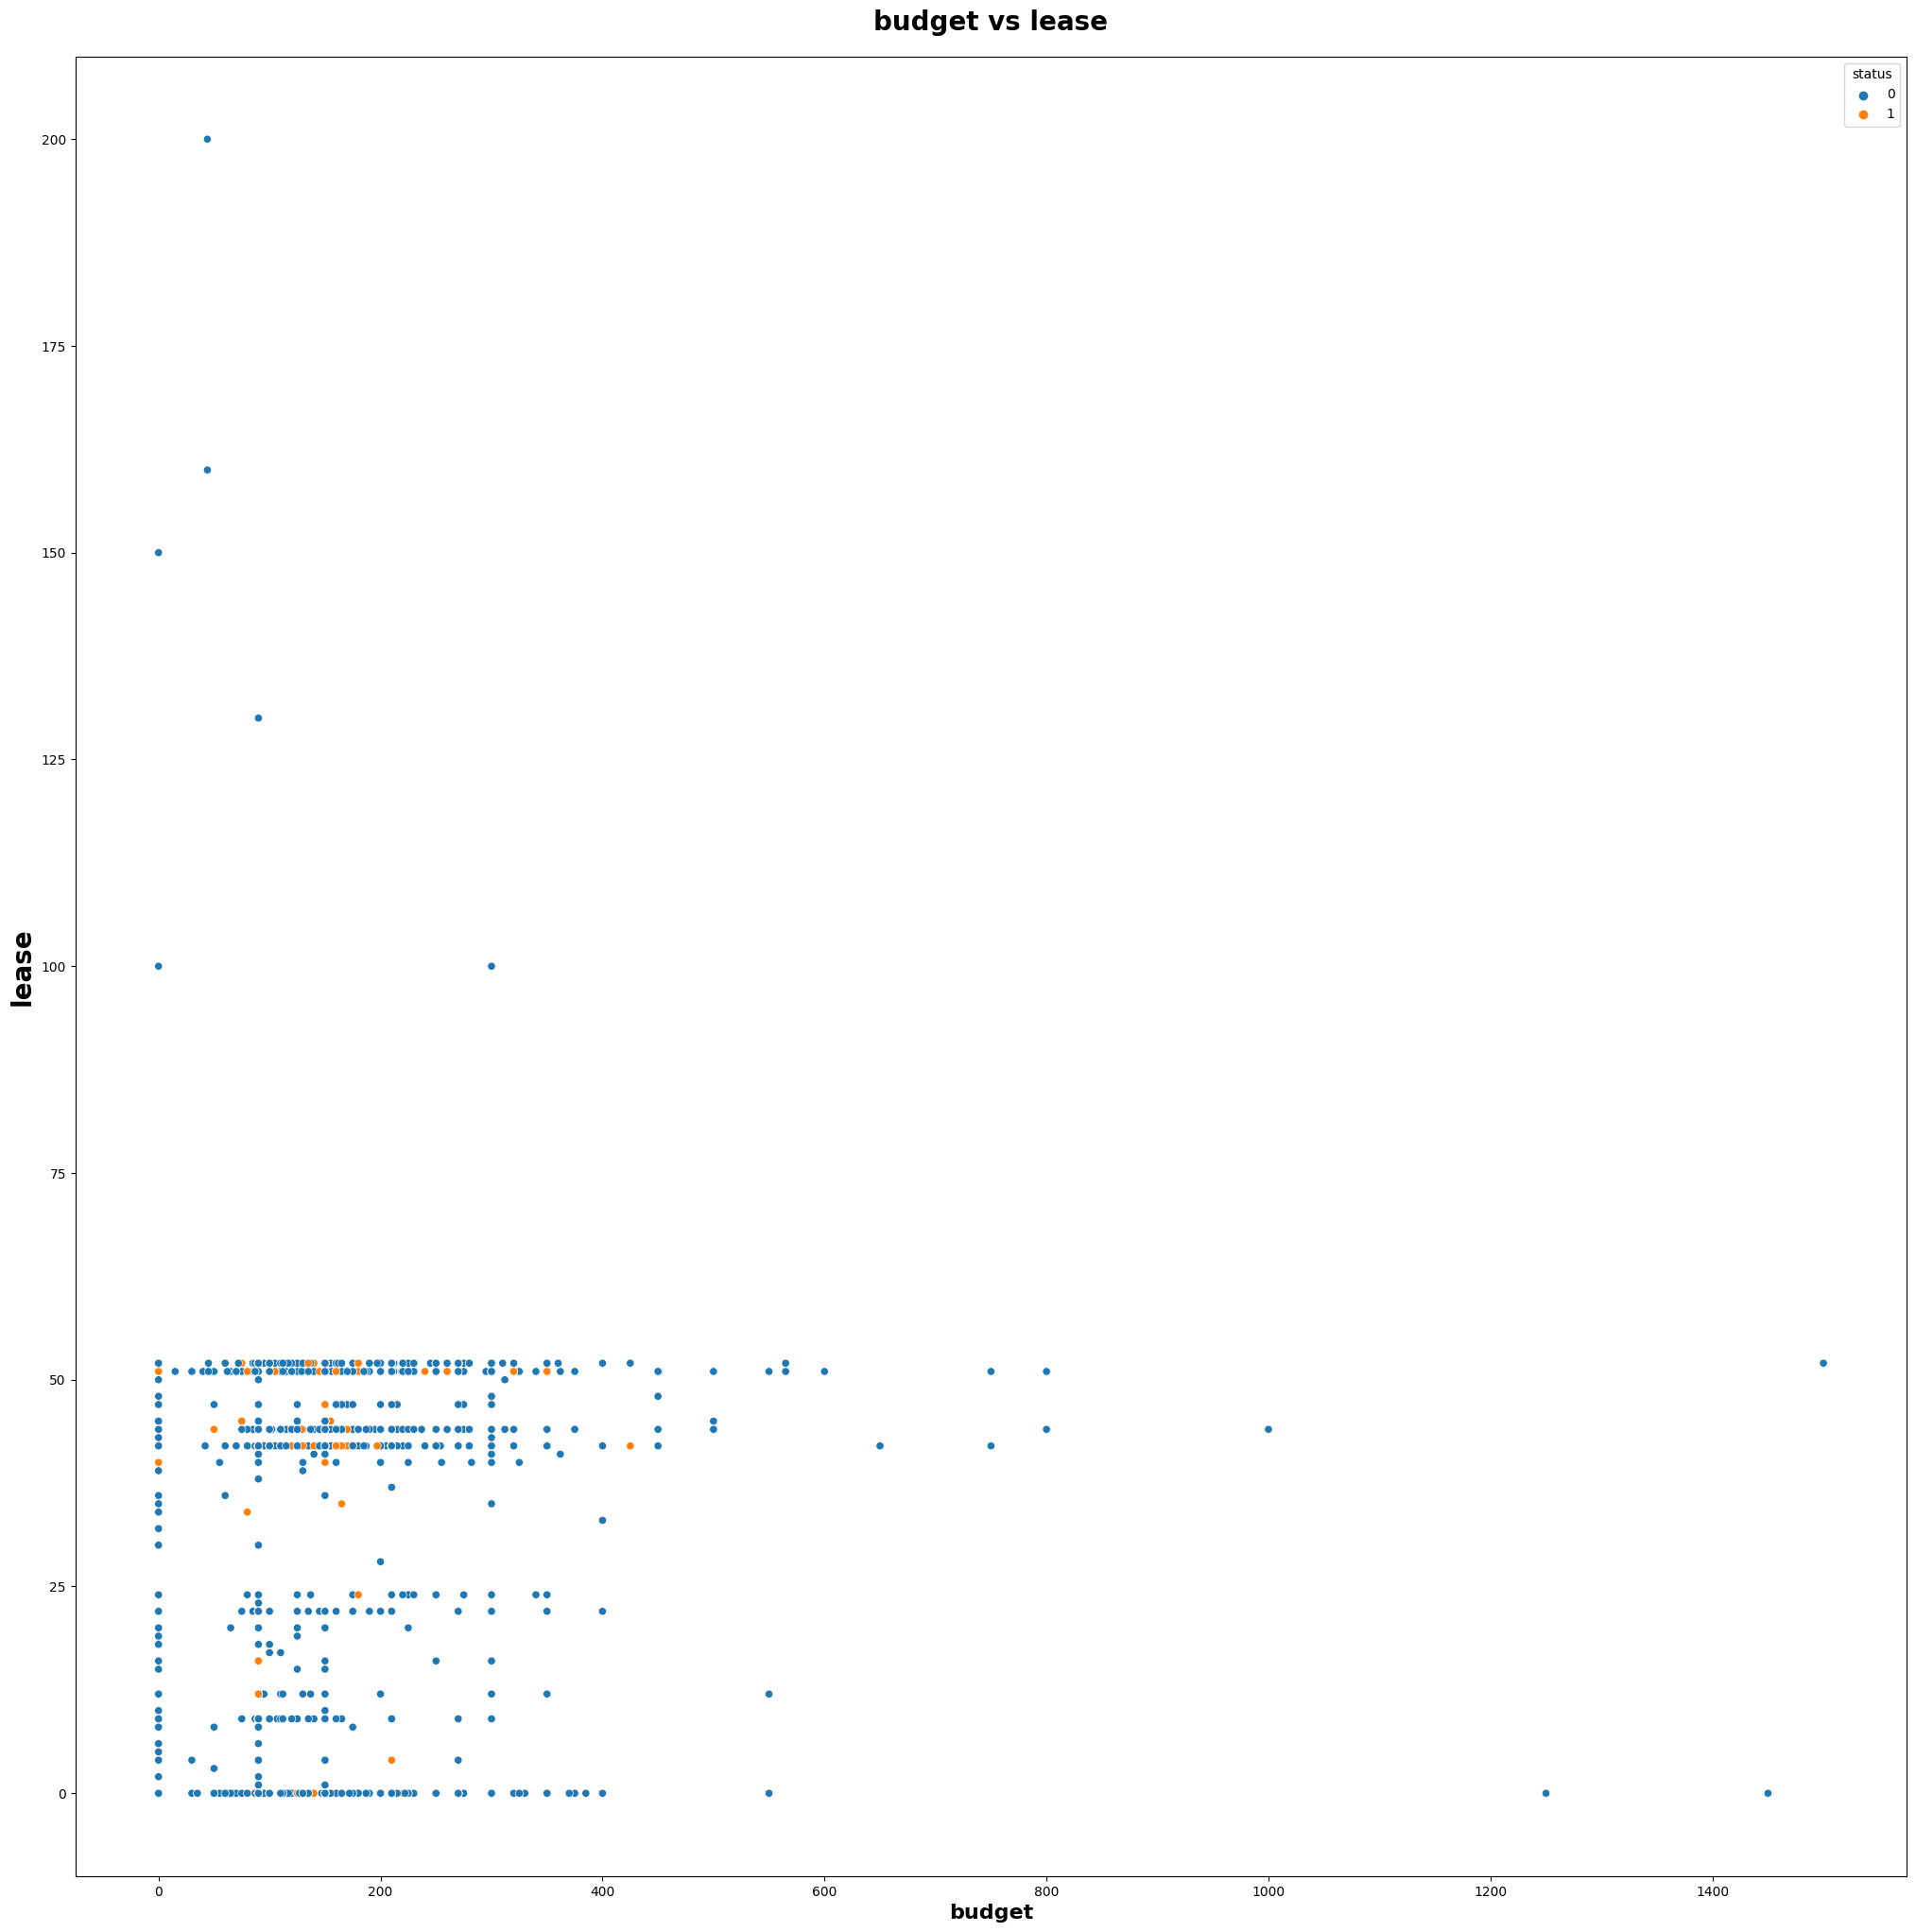

In [77]:
plt.subplots(figsize=(25,25))
sns.scatterplot(x="budget", y='lease', data=df,ec = "white",color='b', hue='status')
plt.title("budget vs lease", weight="bold",fontsize=20, pad=20)
plt.ylabel("lease", weight="bold", fontsize=20)
plt.xlabel("budget", weight="bold", fontsize=16)
plt.show()

In [78]:
df = df.drop("movein", axis= 1)

<Axes: >

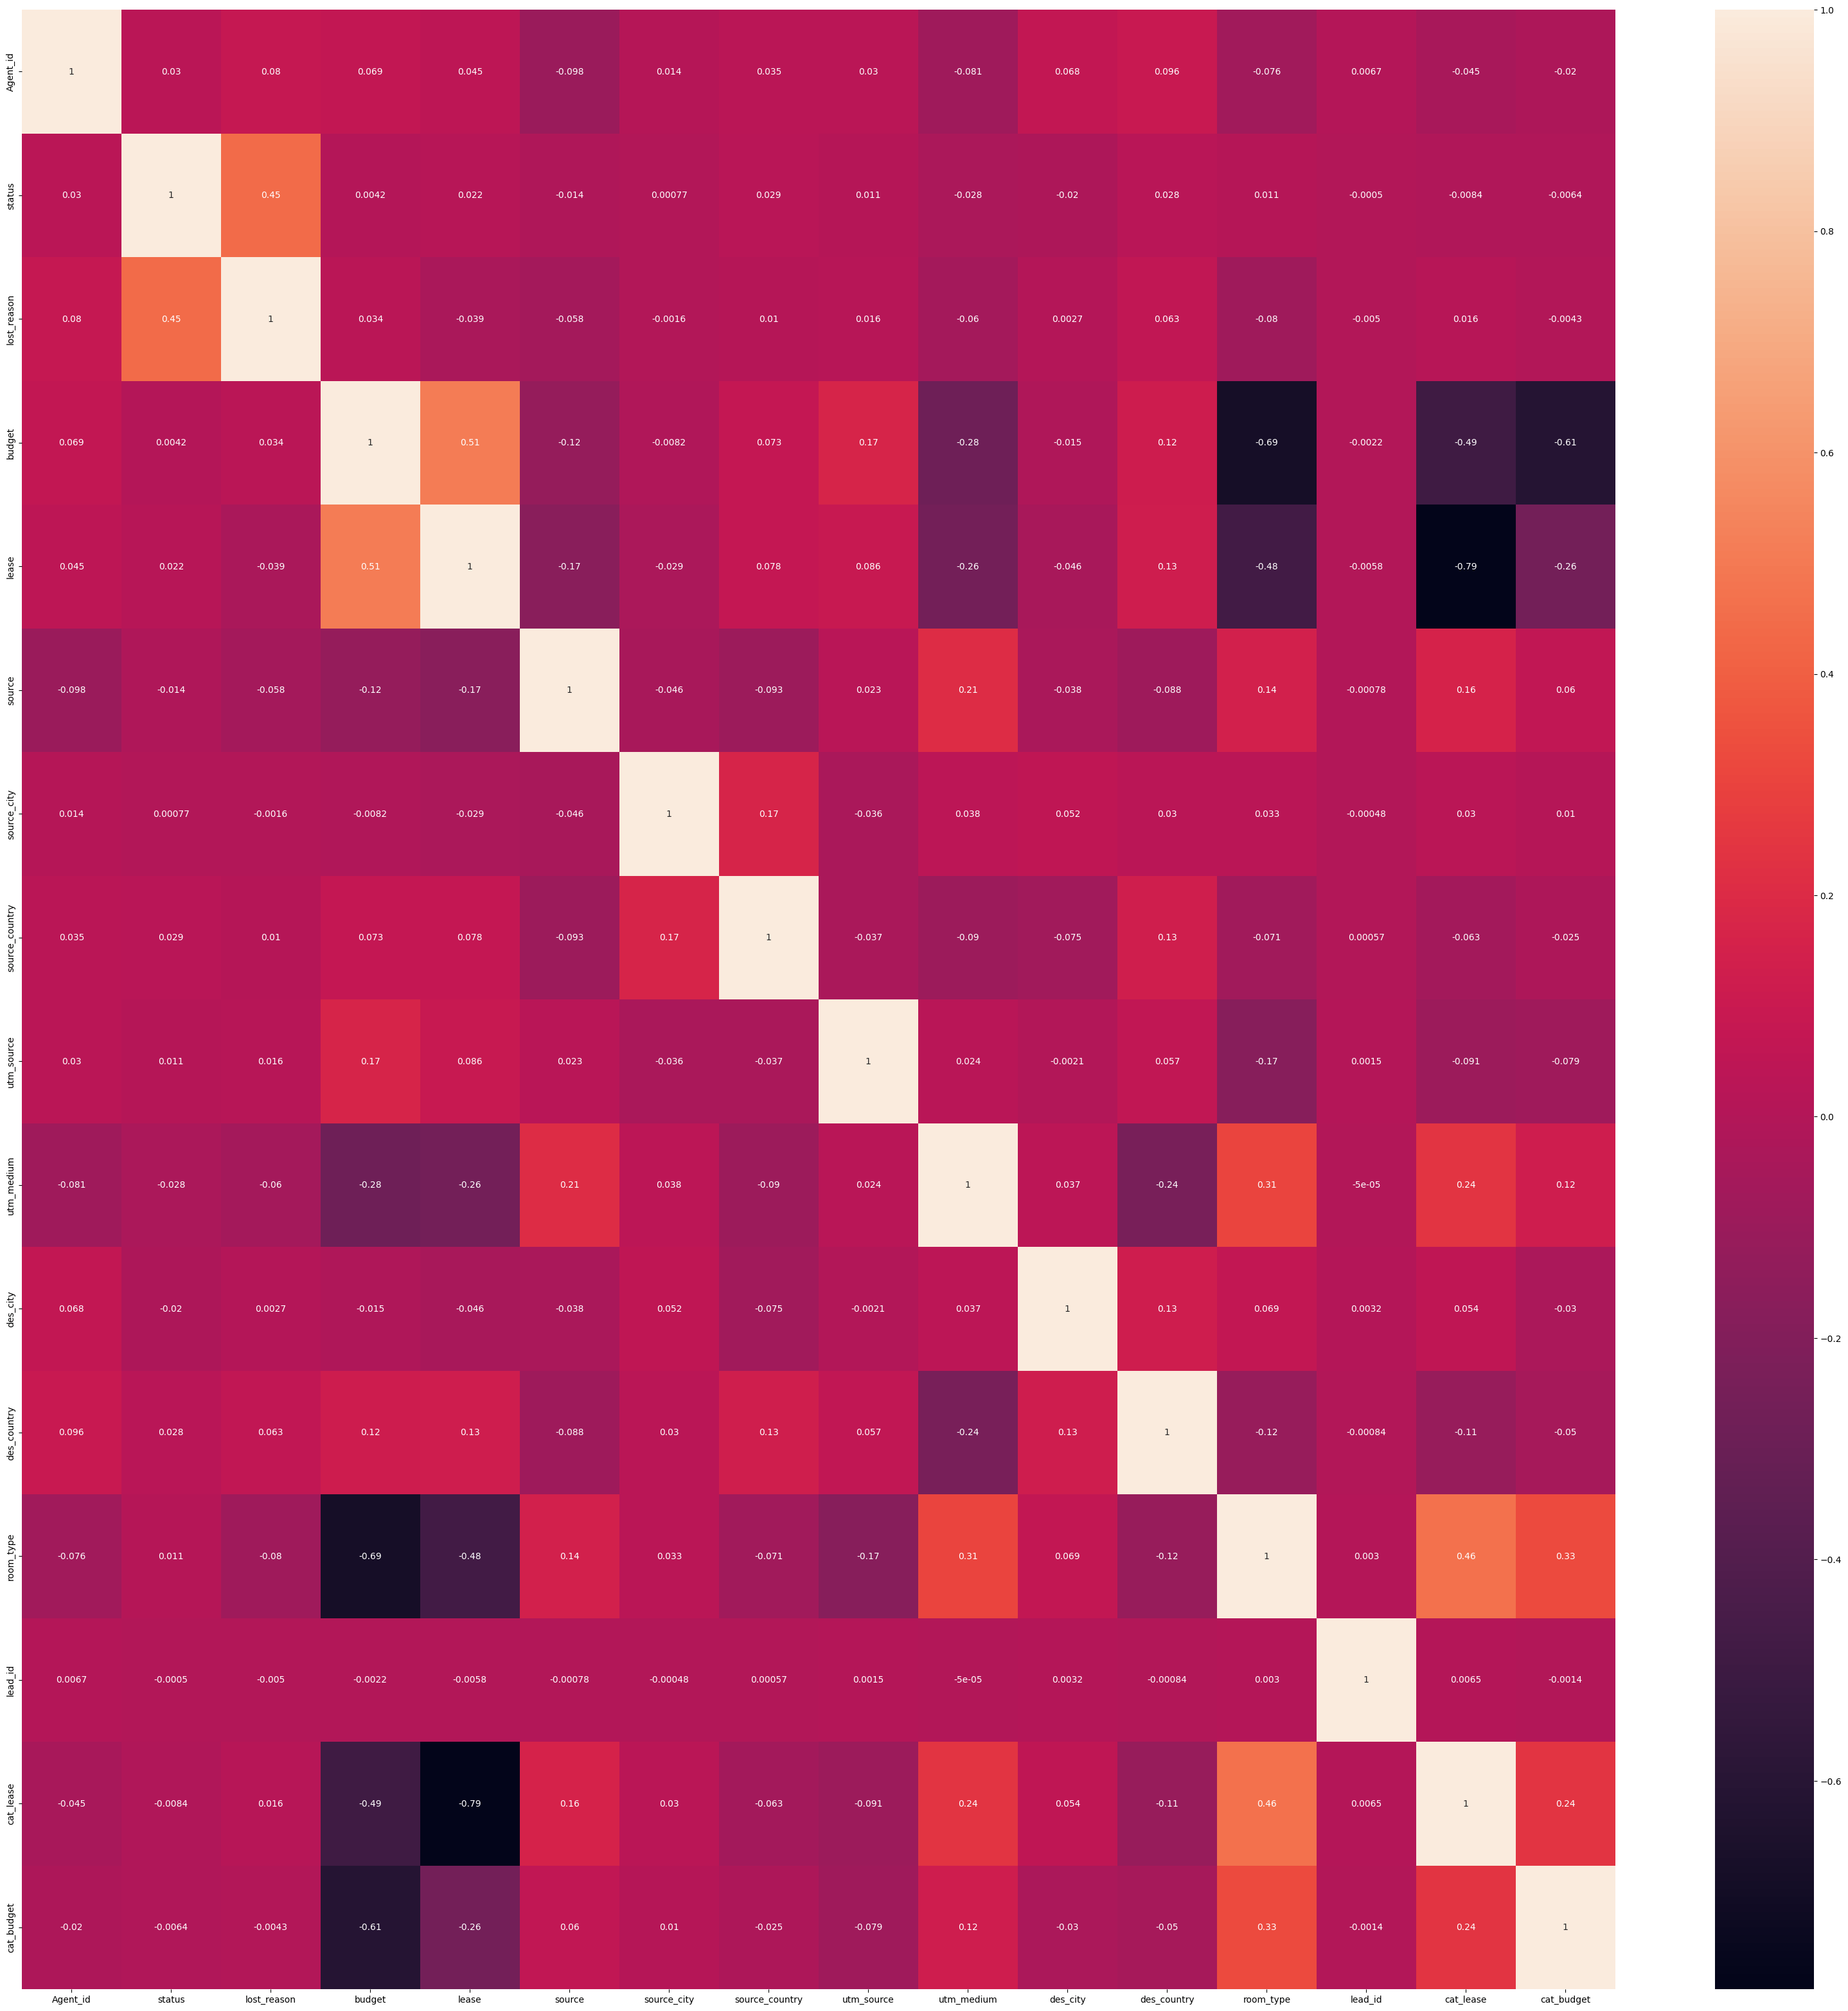

In [79]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot= True)

In [80]:
X = df.drop(["status","budget", "lease"],axis=1)

In [81]:
X

,Agent_id,lost_reason,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,cat_lease,cat_budget
0,80,21,126,2534,163,20,3,18,8,3,15482,1,4
1,103,16,199,2723,163,20,3,26,8,5,3091,5,5
2,13,29,127,2028,99,20,3,199,8,5,18367,0,5
3,13,25,164,999,163,9,3,194,8,5,12967,5,5
4,25,29,126,2195,163,20,3,111,8,0,15482,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36675,13,15,280,2049,99,20,3,22,8,2,2840,2,5
36676,22,24,280,2605,99,20,3,128,8,2,3368,5,5
36677,4,15,126,2049,99,20,3,194,8,2,22451,1,0
36678,55,15,232,3818,131,15,43,194,8,5,3368,5,5


In [82]:
y = df["status"]

In [84]:
df.to_csv("final_data.csv",index= False)


In [ ]:
x_train = df.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [ ]:
y_train.value_counts(0)

status
0    23049
1     1526
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y, random_state=42)

In [ ]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'room_type', 'lead_id', 'cat_lease', 'cat_budget'],
      dtype='object')

In [ ]:
ct = ColumnTransformer([('se', StandardScaler(), ['cat_budget', 'cat_lease', 'room_type'])], remainder='passthrough')

In [ ]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 100))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 100))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 100))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 100))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 100))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 100))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 100))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 100))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 100))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 100))])
#lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
#catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
#xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [ ]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline]

In [ ]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM"}

In [ ]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, X_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 1.0
Adaboost : 1.0
ExtraTree : 0.9995116823025691
BaggingClassifier : 1.0
GradientBoosting : 1.0
DecisionTree : 1.0
KNN : 0.9350560809470492
Logistic : 0.9356260305405952
SGD Classifier : 0.876245449394351
MLPClassifier : 0.9065655225948147
NaiveBayes : 0.9997558659885757
SVM : 0.9379044049101006


In [ ]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)

       
    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))
    
    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
 

In [ ]:
rforest = RandomForestClassifier(random_state= 42)

In [ ]:
evaluate_model(rforest, X_train, y_train, X_test, y_test)


**Confusion Matrix**
Train Confusion Matrix Report:
[[23049     0]
 [    0  1526]]

 Test Confusion Matrix Report:
[[11353     0]
 [    0   752]]
**Accuracy Score**
Train Accuracy is: 1.0

Test Accuracy is: 1.0
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.0

Test Error: 0.0
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    23049.0  1526.0       1.0    24575.0       24575.0

 Test Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision      1.0    1.0       1.0        1.0           1.0
recall         1.0    1.0       1.0        1.0           1.0
f1-score       1.0    1.0       1.0    

In [ ]:
GradientBoost = GradientBoostingClassifier(random_state = 42)
evaluate_model(GradientBoost, X_train, y_train, X_test, y_test)

**Accuracy Score**
Train Accuracy is: 1.0

Test Accuracy is: 1.0
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.0

Test Error: 0.0
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    23049.0  1526.0       1.0    24575.0       24575.0

 Test Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision      1.0    1.0       1.0        1.0           1.0
recall         1.0    1.0       1.0        1.0           1.0
f1-score       1.0    1.0       1.0        1.0           1.0
support    11353.0  752.0       1.0    12105.0       12105.0
---------------------------------------------------------

**Con

In [ ]:
new_pipeline = Pipeline([('transformer', ct), ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
rf_param_grid = [{
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': np.arange(100,2000, 200),
                'classifier__max_depth': [None, 10, 20, 30, 50, 70, 80, 100],
                'classifier__min_samples_split': [2, 3, 5, 7, 10],
                'classifier__min_samples_leaf': [1,2,3,4,5,],
                'classifier__max_features': ['auto', 'sqrt', 'log2'],
                'classifier__bootstrap': [True, False]
               }]

In [ ]:
random_search = RandomizedSearchCV(estimator = new_pipeline, param_distributions = rf_param_grid, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)


In [ ]:
best_rf_model = random_search.fit(x_train, y_train)


In [ ]:
best_rf_model.best_params_